### Imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])
    
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy.signal as sg
import matplotlib.pyplot as plt
from neuropy import plotting
from neuropy.analyses.placefields import Pf1D
import subjects

/home/nkinsky/miniforge3/envs/NeuroPy/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


### Visualize running behavior for all rats and tally lap #s by hand

In [2]:
#1st # = maze trials, 2nd # = remaze trial, 2 trials = 1 lap up/down
ntrials_dict = {"RatUDay2": [25, 17], "RatVDay1": [23, 30], "RatVDay3": [163, 103],
                "RatSDay3": [23, 16], "RatUDay1": [54, 4], "RatUDay4": [32, 4],
                "RatVDay2": [79, 92], "RatRDay2": [41, 10]}

In [17]:
9*60*60



32400

In [16]:
sess.paradigm.to_dataframe()

,start,stop,label,duration
0,0,7288,pre,7288
1,7302,10683,maze,3381
2,10685,43156,post,32471
3,10685,28685,sd,18000
4,28685,43156,rs,14471
5,43157,47043,re-maze,3886


In [14]:
t_bw, t_sd = [, []
for sess in subjects.remaze_sess()[1:]:
    t_bw.append((sess.paradigm['re-maze'].starts[0] - sess.paradigm['maze'].stops[0])/60/60)

t_bw

[9.017222222222221,
 9.014444444444445,
 8.937222222222223,
 9.333888888888888,
 9.003333333333334,
 9.059722222222224,
 9.022777777777778,
 9.020555555555555]

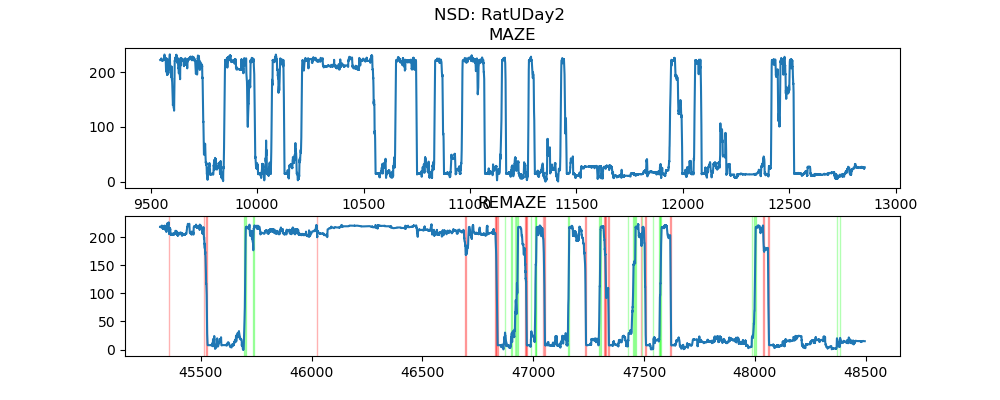

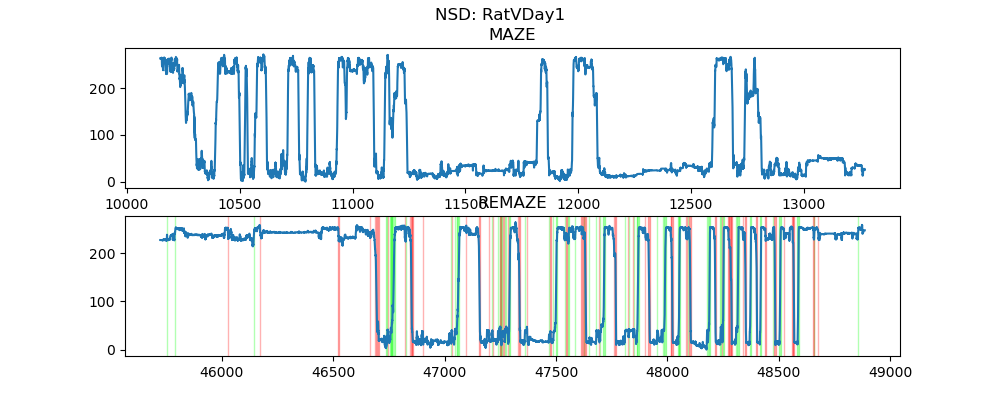

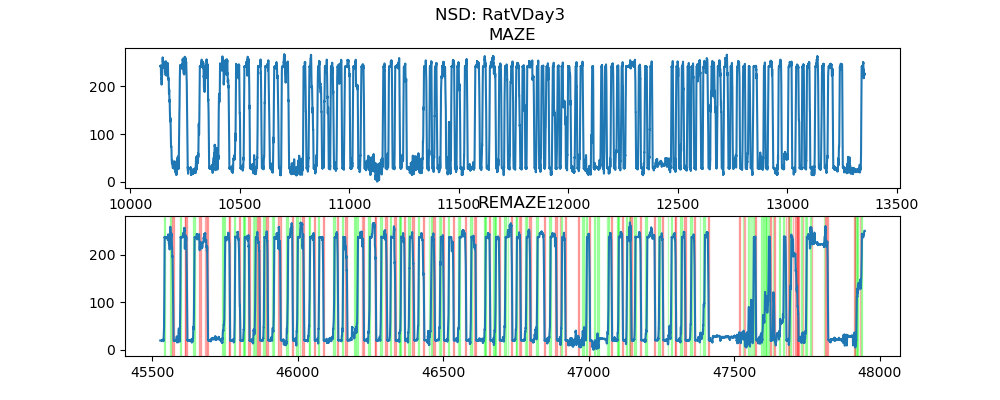

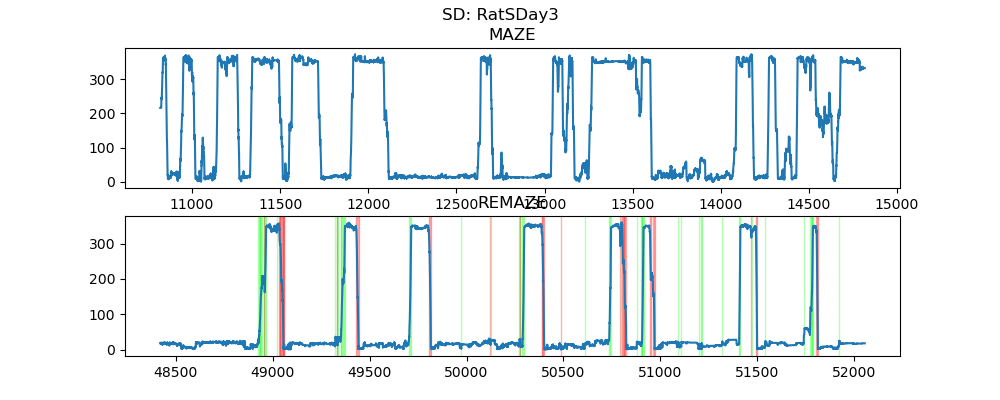

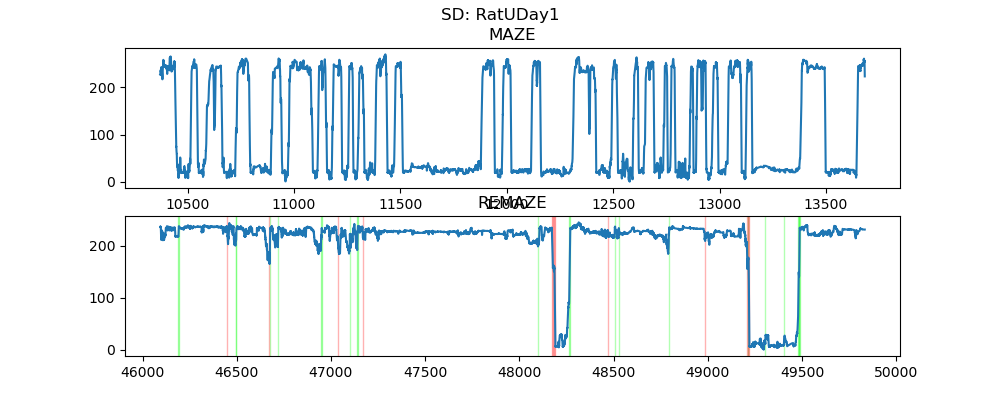

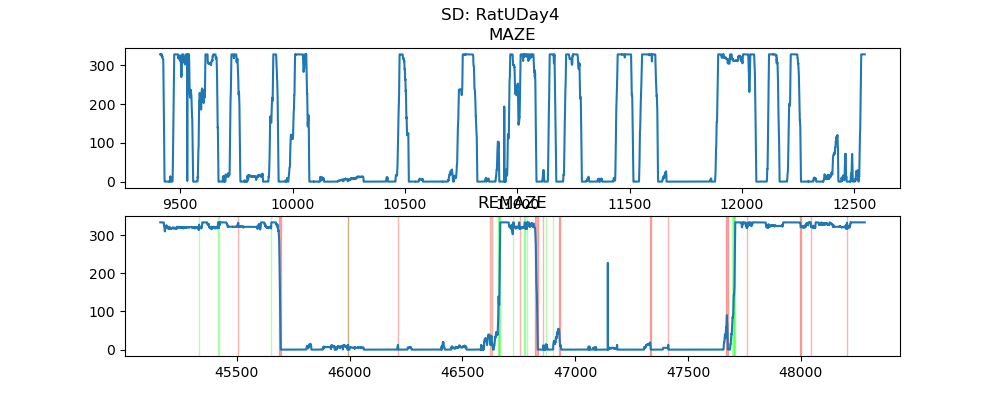

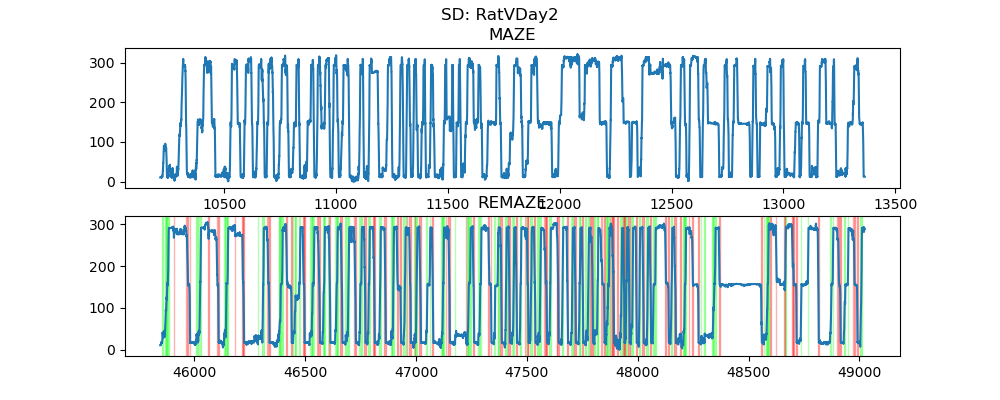

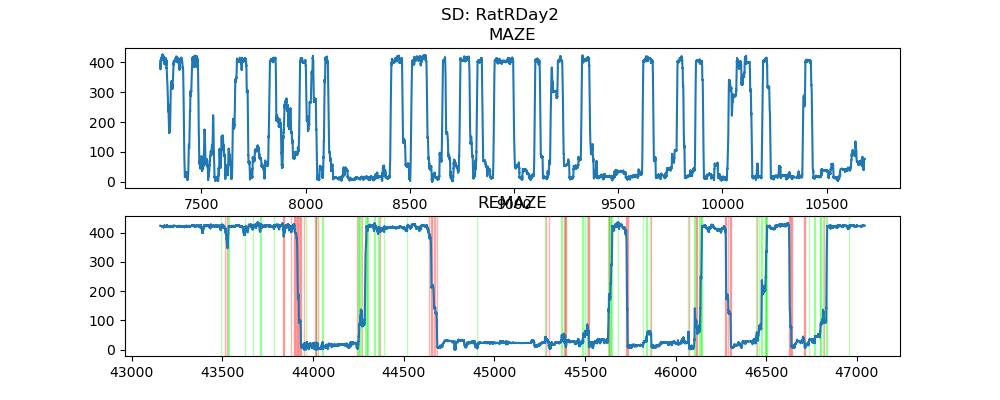

In [3]:
%matplotlib widget
for sess in subjects.remaze_sess()[1:]:
    fig, ax = plt.subplots(2, 1, figsize=(10, 4))
    fig.suptitle(f"{sess.tag}: {sess.name}")
    ax[0].plot(sess.maze.time, sess.maze.x)
    ax[0].set_title("MAZE")
    ax[1].plot(sess.remaze.time, sess.remaze.x)
    ax[1].set_title("REMAZE")
    for col, dir in zip([[0, 1, 0, 0.3], [1, 0, 0, 0.3]], ["up", "down"]):
        for start, stop in zip(sess.remaze_run[dir].starts, sess.remaze_run[dir].stops):
            ax[1].axvspan(start, stop, color=col)

### Placefields and population vector correlation MAZE vs REMAZE

In [170]:
sessions = subjects.remaze_sess()[1:]  # RatSDay2NSD does not have remaze position info
kw = dict(frate_thresh=0, grid_bin=5)

tc_all = []
for s, sess in enumerate(sessions):
    maze = sess.paradigm["maze"].flatten()
    remaze = sess.paradigm["re-maze"].flatten()
    neurons = sess.neurons_stable.get_neuron_type("pyr")

    # ---- Run direction sepearted-------
    tc_maze, tc_remaze = [], []
    for direction in ["up", "down"]:
        maze_run = sess.maze_run[direction]
        pfmaze = Pf1D(neurons, position=sess.maze, epochs=maze_run, **kw)
        tc_maze.append(pfmaze.resample_1D(50).tuning_curves)

        remaze_run = sess.remaze_run[direction]
        pfremaze = Pf1D(neurons, position=sess.remaze, epochs=remaze_run, **kw)
        tc_remaze.append(pfremaze.resample_1D(50).tuning_curves)

    tc_comb = np.hstack((np.vstack(tc_maze), np.vstack(tc_remaze)))

    # ---- Overall----
    # pfmaze = Pf1D(neurons, position=sess.maze, **kw)
    # tc_maze = pfmaze.resample(50).tuning_curves

    # pfremaze = Pf1D(neurons, position=sess.remaze, **kw)
    # tc_remaze = pfremaze.resample(50).tuning_curves

    # tc_comb = np.hstack((tc_maze, tc_remaze))

    tc_comb_df = pd.DataFrame(tc_comb)
    tc_comb_df["session"] = s
    tc_comb_df["grp"] = sess.tag
    tc_all.append(tc_comb_df)

tc_all = pd.concat(tc_all, ignore_index=True)

Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignored when epochs is provided
Note: speed_thresh is ignore

In [73]:
def pf_corr_maze_remaze(row):
    maze_tc = row.values[0:50]
    remaze_tc = row.values[50:]

    return np.corrcoef([maze_tc, remaze_tc])[0, 1]

In [168]:
pd.concat(tc_new_all, axis=0)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,session,grp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NSD
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000272,0.000029,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0,NSD
2,0.613856,0.452430,0.245044,0.096983,0.027828,0.005732,0.000834,0.000081,0.000004,0.000000,...,0.087931,0.224925,0.401131,0.501978,0.440723,0.269721,0.114439,0.038768,0,NSD
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NSD
4,0.498665,0.340796,0.158839,0.050349,0.010835,0.001583,0.000152,0.000005,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,SD
464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000168,0.001671,0.011131,0.050475,0.157141,0.342608,0.544207,0.668329,5,SD
465,0.014001,0.027951,0.047670,0.058163,0.050045,0.030198,0.013006,0.006154,0.010883,0.027222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,SD
466,0.092577,0.062302,0.028093,0.008426,0.001667,0.000216,0.000017,0.000000,0.000000,0.000000,...,0.000883,0.006832,0.034684,0.118327,0.281176,0.491989,0.679906,0.787922,5,SD


In [202]:
from copy import deepcopy
corrs = []
# for row in tc_all.drop(columns=["session", "grp"]).iterrows():
for row in pd.concat(tc_new_all, axis=0).drop(columns=["session", "grp"]).iterrows():
    corrs.append(pf_corr_maze_remaze(row[1]))
tc_new_df = deepcopy(pd.concat(tc_new_all, axis=0).reset_index())
tc_new_df["PF Corr"] = corrs
tc_new_df["comp"] = 1

/home/nkinsky/miniforge3/envs/NeuroPy/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/nkinsky/miniforge3/envs/NeuroPy/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


<Axes: xlabel='PF Corr', ylabel='Proportion'>

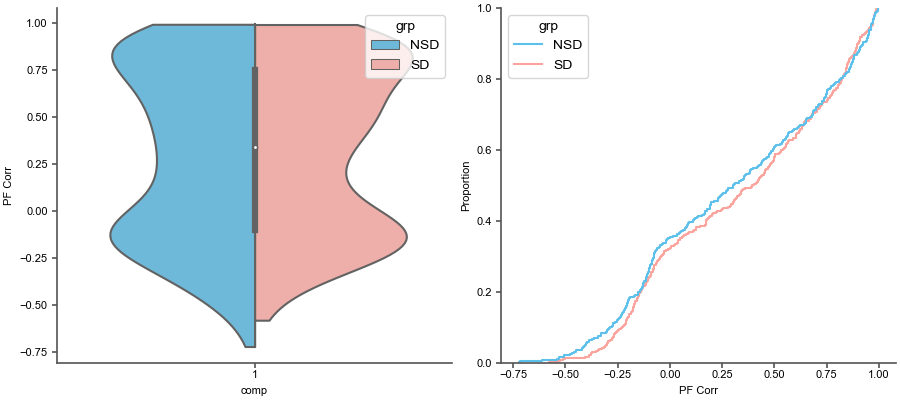

In [203]:
_, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.violinplot(data=tc_new_df, x="comp", y="PF Corr", hue="grp", split=True, cut=0, ax=ax[0])
sns.ecdfplot(data=tc_new_df, x="PF Corr", hue="grp", ax=ax[1])

#### Plot PF Corrs by position on the track

In [195]:
tc_new_df

,index,0,1,2,3,4,5,6,7,8,...,94,95,96,97,98,99,session,grp,PF Corr,comp
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NSD,NaN,1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0,NSD,NaN,1
2,2,0.613856,0.452430,0.245044,0.096983,0.027828,0.005732,0.000834,0.000081,0.000004,...,0.401131,0.501978,0.440723,0.269721,0.114439,0.038768,0,NSD,-0.095541,1
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NSD,NaN,1
4,4,0.498665,0.340796,0.158839,0.050349,0.010835,0.001583,0.000152,0.000005,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NSD,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,5,SD,NaN,1
918,464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011131,0.050475,0.157141,0.342608,0.544207,0.668329,5,SD,0.787903,1
919,465,0.014001,0.027951,0.047670,0.058163,0.050045,0.030198,0.013006,0.006154,0.010883,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,SD,-0.207150,1
920,466,0.092577,0.062302,0.028093,0.008426,0.001667,0.000216,0.000017,0.000000,0.000000,...,0.034684,0.118327,0.281176,0.491989,0.679906,0.787922,5,SD,0.992001,1


In [204]:
tc_new_df[["grp", "session", "PF Corr"]].groupby(["grp", "session"]).mean(numeric_only=True)

PF Corr
grp session          
NSD 0        0.370205
    1        0.120517
    2        0.222423
SD  3        0.434872
    4        0.190545
    5        0.281311
    6        0.456611
    7        0.434688

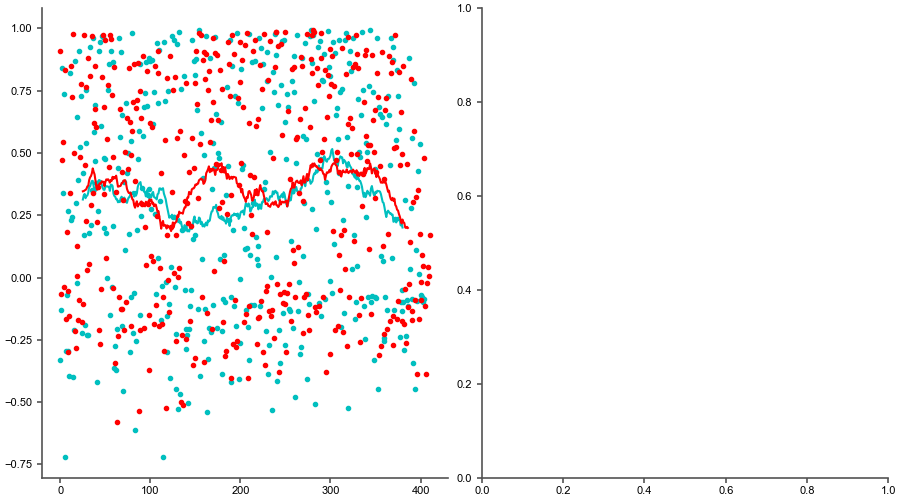

In [205]:
_, ax = plt.subplots(1, 2, figsize=(9, 5))
window = 50
for col, grp in zip(["c", "r"], ["NSD", "SD"]):
    corrs = tc_new_df[tc_new_df.grp == grp]["PF Corr"]
    ax[0].plot(corrs[~np.isnan(corrs)].values, '.', color=col)
    ax[0].plot(corrs[~np.isnan(corrs)].rolling(window, center=True).mean().values, color=col)

# sns.ecdfplot(data=tc_new_df, x="index", y="PF Corr", ax=ax[1], hue="grp")

In [184]:
np.any(np.isnan(tc_new), axis=1).sum()

96

/home/nkinsky/Documents/GitHub/NeuroPy/neuropy/utils/mathutil.py:67: RuntimeWarning: invalid value encountered in divide
  return (x - np.min(x, axis=axis, keepdims=True)) / np.ptp(
/home/nkinsky/Documents/GitHub/NeuroPy/neuropy/utils/mathutil.py:67: RuntimeWarning: invalid value encountered in divide
  return (x - np.min(x, axis=axis, keepdims=True)) / np.ptp(


(454, 100)
(468, 100)


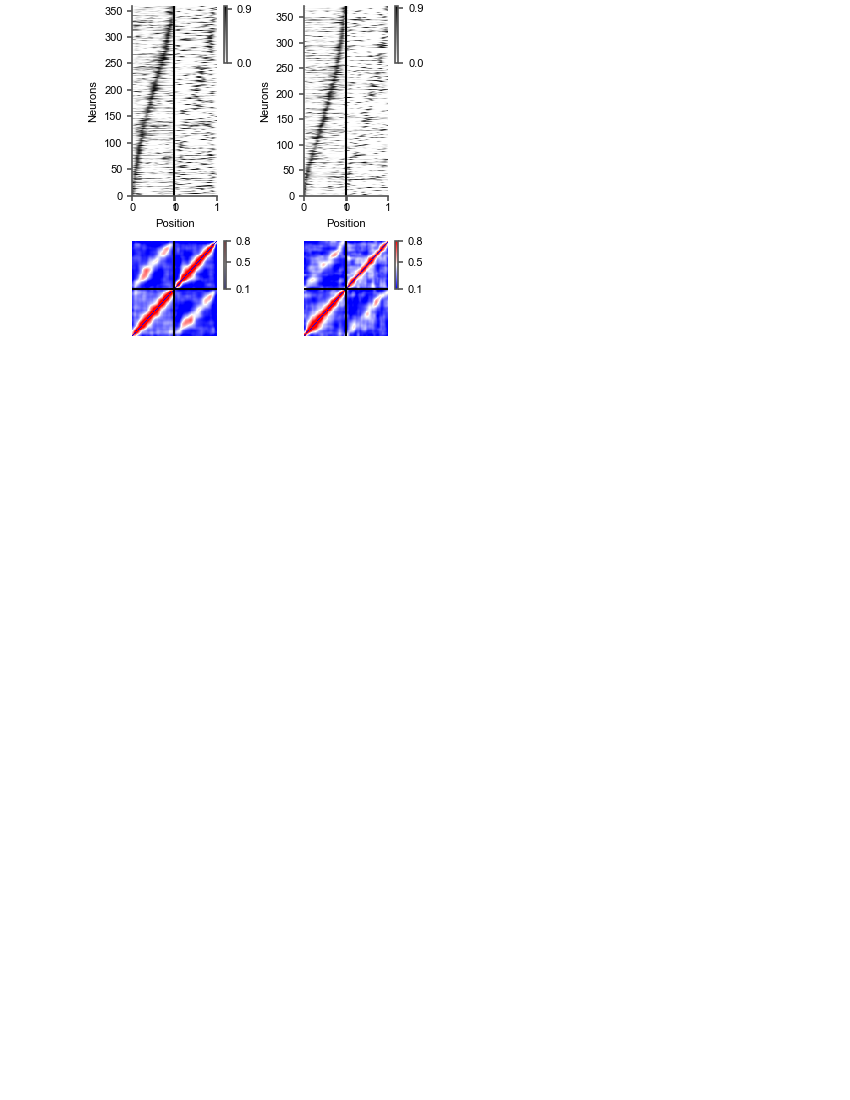

In [207]:
from neuropy.utils.mathutil import min_max_scaler
from scipy.ndimage import gaussian_filter1d, gaussian_filter

fig = plotting.Fig(11, 8)

exclude_nan = True
corr_all, tc_new_all = [], []
for g, grp in enumerate(["NSD", "SD"]):
    tc_grp = tc_all[tc_all.grp == grp].iloc[:, :100].to_numpy()
    # tc_grp = gaussian_filter1d(tc_grp, sigma=1.5, axis=1)
    tc_new = np.zeros_like(tc_grp)
    tc_new[:, :50] = min_max_scaler(tc_grp[:, :50], axis=1)
    tc_new[:, 50:] = min_max_scaler(tc_grp[:, 50:], axis=1)
    # tc_new =  min_max_scaler(tc_grp,axis=-1)
    sort_ind = np.argsort(np.argmax(tc_new[:, :50], axis=1))
    tc_new = gaussian_filter1d(tc_new, sigma=1.5, axis=1)
    tc_new_df = pd.DataFrame(tc_new[sort_ind])
    tc_new_df["session"] = tc_all[tc_all.grp == grp].session.values[sort_ind]
    tc_new_df["grp"] = grp
    tc_new_all.append(tc_new_df)
    print(tc_new.shape)

    ax = fig.subplot(fig.gs[:2, g + 1])
    pf_plot = tc_new[sort_ind, :]
    pf_plot = pf_plot[~np.any(np.isnan(pf_plot), axis=1)] if exclude_nan else pf_plot
    pf_im = ax.pcolormesh(pf_plot, cmap="binary", rasterized=True)
    ax.axvline(50, color="k")
    ax.set_xticks([0, 50, 51, 100], [0, 1, 0, 1])
    ax.set_ylabel("Neurons")
    ax.set_xlabel("Position")
    pf_cb = plt.colorbar(pf_im, anchor=(1, 1), shrink=0.3, ticks=[0, 0.9])

    ax = fig.subplot(fig.gs[2, g + 1])
    corr = gaussian_filter(np.corrcoef(tc_grp.T), 1)
    np.fill_diagonal(corr, 0)
    corr_all.append(corr)
    corr_im = ax.pcolormesh(corr, cmap="bwr", vmin=0.1, vmax=0.8, rasterized=True)
    ax.axvline(50, color="k")
    ax.axhline(50, color="k")
    ax.axis("off")
    corr_cb = plt.colorbar(corr_im, shrink=0.5, anchor=(1, 1), ticks=[0.1, 0.5, 0.8])


# fig.savefig(subjects.figpath_sd / "maze_remaze_pf_run_direction")

NSD Off diagonal corrs = [0.3486723  0.20272726 0.20272726 0.23809792]
NSD On diagonal corrs = [0.83024373 0.46289302 0.46289302 0.77422362]
SD Off diagonal corrs = [0.31408252 0.22569508 0.22569508 0.29226782]
SD On diagonal corrs = [0.80905704 0.40159052 0.40159052 0.68243003]


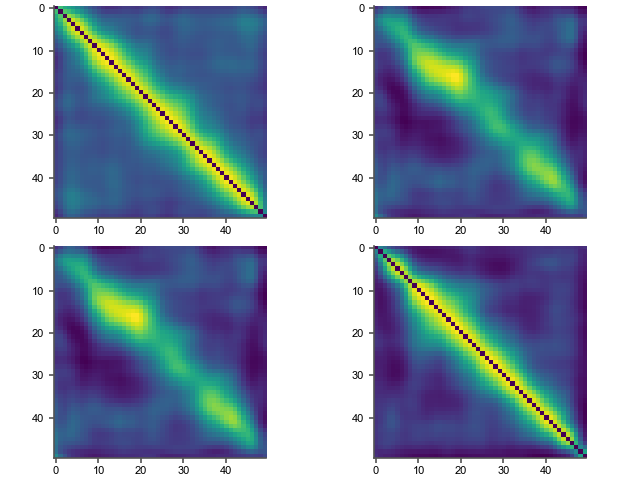

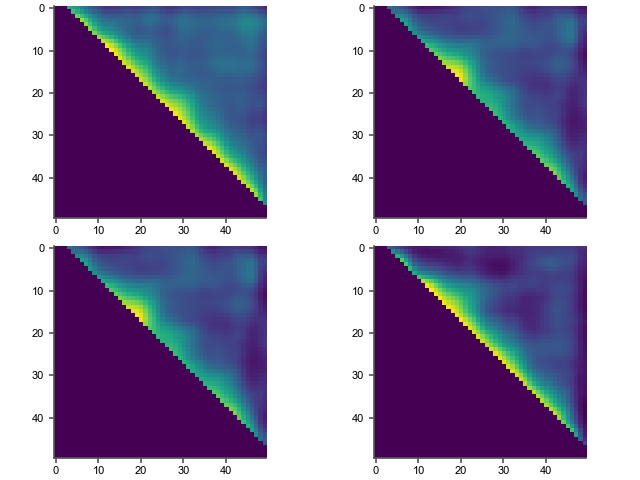

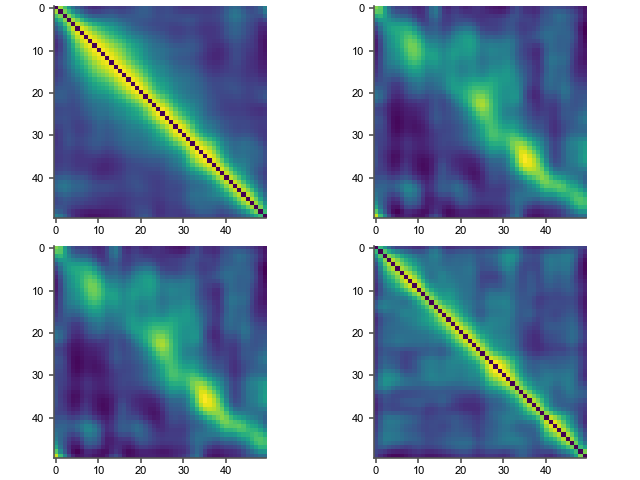

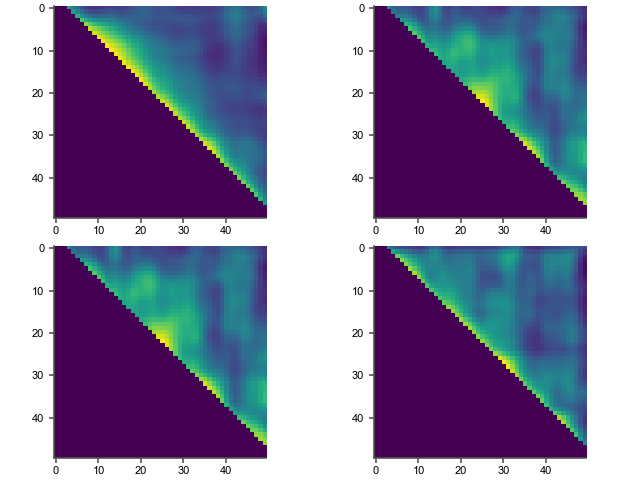

In [208]:
for grp, corr in zip(["NSD", "SD"], corr_all):

    maze_corr = corr[0:50,0:50]
    remaze_corr = corr[50:100, 50:100]
    maze_remaze_corr = corr[0:50, 50:100]
    noffset = 3
    
    _, ax = plt.subplots(2,2)
    for a, corr_use in zip(ax.reshape(-1), [maze_corr, maze_remaze_corr, maze_remaze_corr, remaze_corr]):
        a.imshow(corr_use)
    
    _, ax = plt.subplots(2,2)
    corr_off, corr_diag = [], []
    for a, corr_use in zip(ax.reshape(-1), [maze_corr, maze_remaze_corr, maze_remaze_corr, remaze_corr]):
        c_trim = np.triu(corr_use, noffset)
        a.imshow(c_trim)
        corr_off.append(c_trim[c_trim != 0])
        cdiag = np.diagonal(np.triu(corr_use), offset=noffset - 1)
        corr_diag.append(cdiag[cdiag != 0])
        
    print(f'{grp} Off diagonal corrs = {np.array(corr_off).mean(axis=1)}')
    print(f'{grp} On diagonal corrs = {np.array(corr_diag).mean(axis=1)}')